# Visión por computadora
### Taller 2
En este taller se solicita realizar un algoritmo que de manera automática cuente las células completas existentes en la imagen ‘cell.jpg’, calcule el área de los núcleos (en pixeles) y grafique el núcleo de la célula más grande y de la más pequeña. 
Nota: Para ser considerada una célula completa esta debe contar con: un núcleo (azul), un plasta (rojo) y una membrana (verde). Las células que tienen núcleo doble cuenta como una sola.

A continuación, se solicitan los pasos mínimos que usted debe realizar en este taller, sin embargo, usted puede adicionar todos los pasos que considere necesarios.

### Descargar imágenes

In [197]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')

La carpeta ya existe


In [198]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1)	Cargue la imagen llamada ‘cell.jpg’ contenida en la carpeta ‘Imágenes’

In [199]:
ima = cv2.imread(r"Imagenes\cell.jpg")

### 2)	Grafique la imagen en cualquier espacio de color

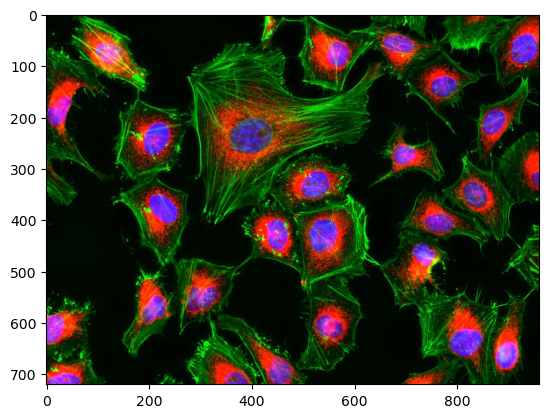

In [200]:
cell=cv2.cvtColor(ima,cv2.COLOR_BGR2RGB)
plt.imshow(cell)
plt.show()

### 3)	Realice un cambio de espacio de color u obtenga el plano en el cual usted considere es mas viable realizar el conteo.

In [201]:
imgB=cell[:,:,2]
# c2=cv2.cvtColor(imgB,cv2.COLOR_BGR2GRAY)
# imgB = cv2.equalizeHist(imgB)


### 4) Grafique el resultado obtenido en el paso anterior

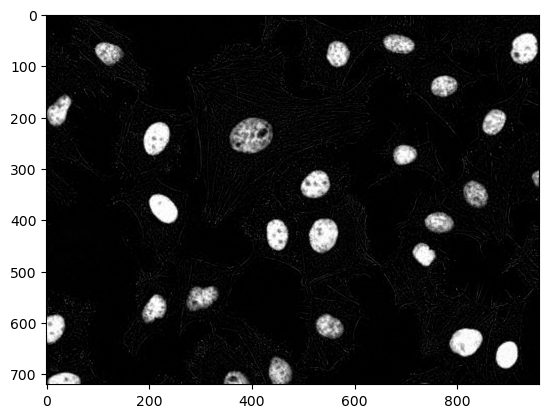

In [202]:
plt.imshow(imgB, cmap='gray')
plt.axis('on')
plt.show()

### 5)	Realice un proceso de segmentación para separar las células del fondo y grafique su resultado. Sugerencia: puede realizar un proceso de umbralización.

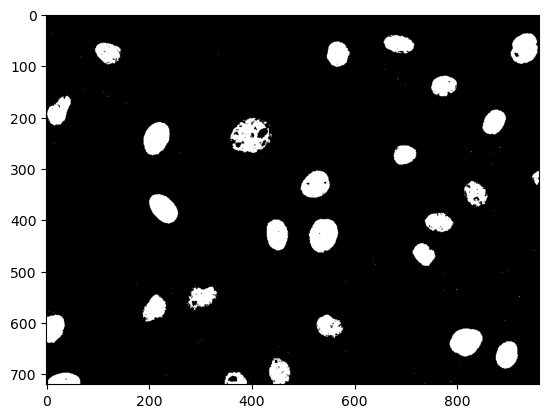

In [203]:
u,bin=cv2.threshold(imgB,100,255,cv2.THRESH_BINARY)
plt.imshow(bin, cmap='gray')
plt.axis('on')
plt.show()

### 6) Elimine los elementos pequeños que no son células. Grafique su resultado.

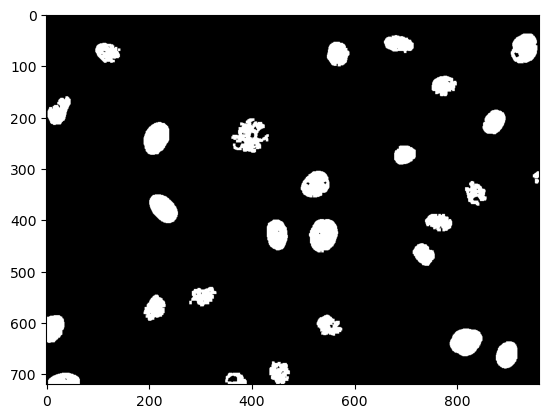

In [204]:
kernel = np.ones((3,3),np.uint8)
# ima2 = cv2.dilate(bin,kernel,iterations = 2)
# ima2 = cv2.erode(ima2,kernel,iterations = 2)
imaOp2=cv2.morphologyEx(bin, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(imaOp2, cmap='gray')
plt.axis('on')
plt.show()

### 7)	Elimine los agujeros al interior de las células para reducir el error a la hora de calcular el área.

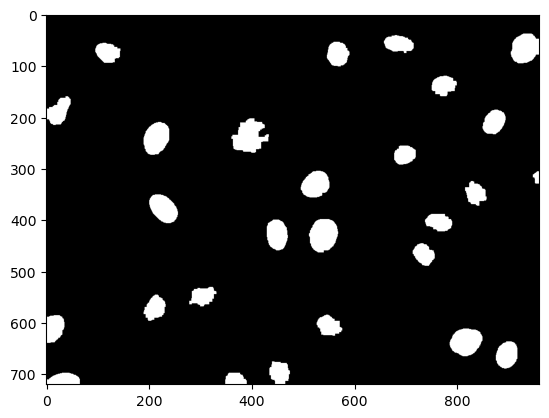

In [205]:
fin=cv2.morphologyEx(imaOp2, cv2.MORPH_CLOSE, kernel, iterations = 5)
plt.imshow(fin, cmap='gray')
plt.axis('on')
plt.show()

### 8) Cuente el número de células e imprima el resultado. Grafique su resultado.

28


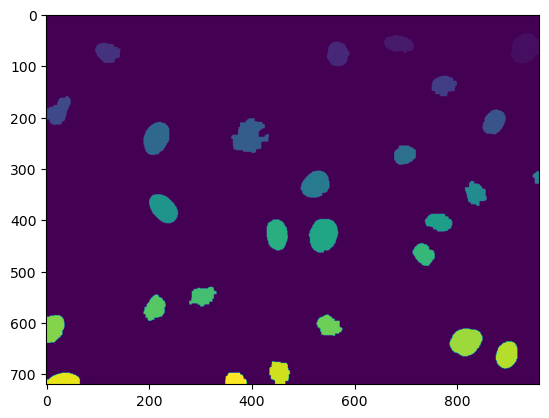

In [206]:
elem,mask=cv2.connectedComponents(fin)
print (elem)
plt.imshow(mask)
plt.show()

### 9)	Calcule el área de cada uno de los núcleos y guárdelos en un arreglo. Imprima su resultado.

In [207]:
Tam=np.zeros(elem)
for i in range(elem-1):
    Tam[i]=np.sum(mask==i)
print ('Tamanhos de todos los elementos ', Tam)

Tamanhos de todos los elementos  [6.45671e+05 2.53300e+03 1.47000e+03 1.61100e+03 1.42400e+03 1.41700e+03
 1.67600e+03 1.59900e+03 3.06300e+03 2.47100e+03 1.25300e+03 2.21400e+03
 2.11000e+02 1.31100e+03 2.24200e+03 1.37300e+03 2.85700e+03 1.97100e+03
 1.29800e+03 1.36100e+03 1.45900e+03 1.40900e+03 1.61900e+03 2.60300e+03
 1.76400e+03 1.38300e+03 1.16200e+03 0.00000e+00]


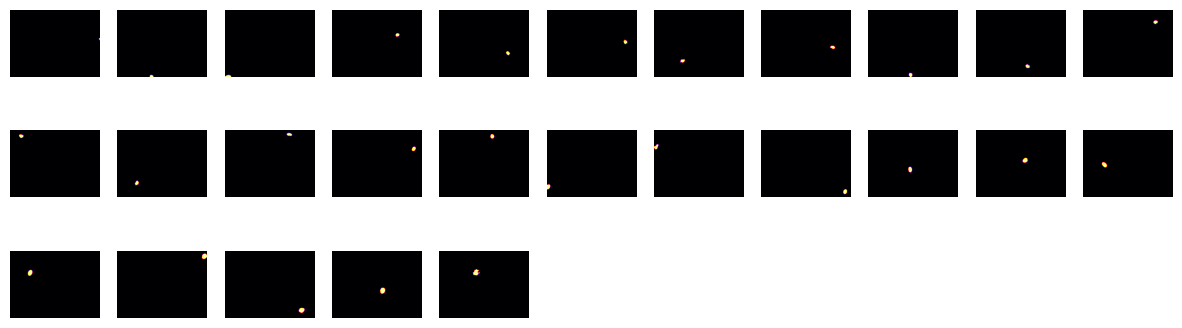

In [208]:
plt.figure(figsize=(15,6))
for i in range(elem-1):
    bol=mask==Ind[i]
    plt.subplot(4,11,i+1)
    plt.imshow(mask*bol, cmap='inferno')
    plt.axis('off')
plt.show()

### 10) Busque el área del núcleo de mayor tamaño e imprima su valor

In [209]:
# Tam  = np.delete(Tam, -1)
# max=np.max(Tam)
# max = int(max)
# indice = np.where(Tam == max)

max3=np.max(Tam)
max=np.max(Tam)
max

645671.0

### 11) Grafique únicamente el núcleo de mayor tamaño.

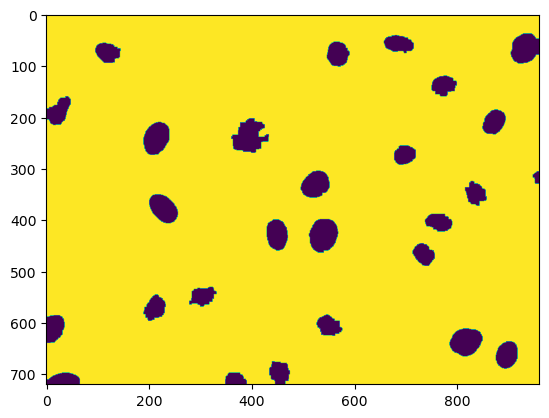

In [210]:
indice2 = np.where(Tam == max)
plt.imshow(mask==indice2)
plt.show()

### 12) Busque el área del núcleo de menor tamaño e imprima su valor

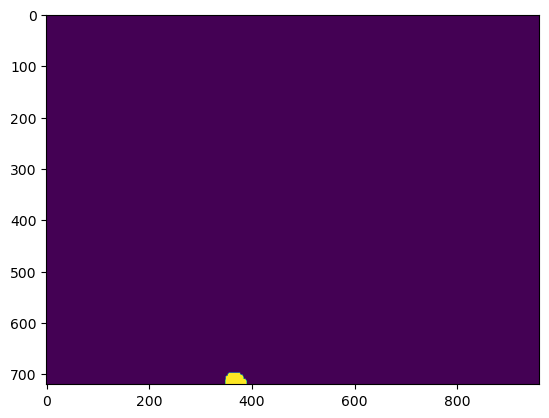

In [211]:
min=np.min(Tam)
min
indice2 = np.where(Tam == min)
plt.imshow(mask==indice2)
plt.show()

### 13) Grafique únicamente el núcleo de menor tamaño.